# Regresion Lineal y multiple
## Felicidad y Producto Interno Bruto (GDP)

En este investigacion se comparara la relacion entre la felicidad a partir de datos de la World Happiness Report (WHR) y la relacion que tiene con distintas variables de interes (economicas), esto a partir de una regresión lineal simple y multiple.

## Pasos generales
- Exploracion de datos y su contextualizacion
- Modelos de regresion lineal simple
- Extension del dataset (integracion de nuevas variables)
- Modeo de regresion lineal multiple
- Comparacion y conclusiones

## Metodologia
- Trabajar con las variables, especialmente las economicas ya que tienden a variar con cada pais

# Cargar Datos

In [ ]:
# Conectar el drive e incluir librerias necesarias
from google.colab import drive
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# importar el dataset
df = pd.read_csv('/content/drive/MyDrive/Inteligencia_Artificial_1/A1.2 Felicidad y GDP.csv')

In [ ]:
# Ver dataset
df.head(5)

,Pais,Felicidad,GDP
0,Finland,7.8210,2.718370e+11
1,Denmark,7.6362,3.560850e+11
2,Iceland,7.5575,2.171808e+10
3,Switzerland,7.5116,7.522480e+11
4,Netherlands,7.4149,9.138650e+11


Nota: las unidades parecen ser USD, esto ya que se buscaron los datasets y coinciden los datos, aunque estan redondeados, pero coinciden los datos del 2020 de indicadores financieros como lo es "macrotrends" y WHR, las unidades de felicidad son relativas, provienen de una pregunta llamada la escalera de cantril, propuesta por "Gallup World Poll"

Ya sabiendo que las unidades son Millones de dolares, una propuesta inteligente seria renombrar la variable a GDP(Mill USD) y especificar la variable de Felicidad con unidades de cantril ladder

In [ ]:
# Renombrar columnas
df = df.rename(columns={'Felicidad': 'Felicidad (cantril ladder)', 'GDP': 'GDP(Mill USD)'})
df.head()

,Pais,Felicidad (cantril ladder),GDP(Mill USD)
0,Finland,7.8210,2.718370e+11
1,Denmark,7.6362,3.560850e+11
2,Iceland,7.5575,2.171808e+10
3,Switzerland,7.5116,7.522480e+11
4,Netherlands,7.4149,9.138650e+11


In [ ]:
# Convertir a Millones de dolares para mejor interpretacion
df['GDP(Mill USD)'] = df['GDP(Mill USD)']/1000000
df.head()

,Pais,Felicidad (cantril ladder),GDP(Mill USD)
0,Finland,7.8210,271837.000000
1,Denmark,7.6362,356085.000000
2,Iceland,7.5575,21718.075725
3,Switzerland,7.5116,752248.000000
4,Netherlands,7.4149,913865.000000


In [ ]:
# ver tamaño del dataset
df

,Pais,Felicidad (cantril ladder),GDP(Mill USD)
0,Finland,7.8210,271837.000000
1,Denmark,7.6362,356085.000000
2,Iceland,7.5575,21718.075725
3,Switzerland,7.5116,752248.000000
4,Netherlands,7.4149,913865.000000
...,...,...,...
136,Botswana,3.4711,14930.072799
137,Rwanda,3.2682,10184.345442
138,Zimbabwe,2.9951,18051.170799
139,Lebanon,2.9553,25948.915861


Vemos que tenemos 141 observaciones y 3 variables, pais, Felicidad en la escala de cantril y el GDP en millones de dolares

Discusion rapida: como puede estar asociado el PIB con la feliciad?, bueno, intuitivamente podemos pensar que los paises con mejor PIB y Per capita, pueden acceder a una mejor calidad de vida, economicamente hablando, abriendo oportunidades laborales y nuevas experiencias que contribuyen a una mejor percepcion de la calidad de vida en la escala de cantril.

Sin embargo, esto podria no ser tan acertado, la limitante de solo analizar esa variable como determinante absoluto de la felicidad conllevaria sesgos y errores debido a que la felicidad no es algo que podamos medir con mucha presición y exactitud, al ser algo subjetivo de cada persona, abarcando sus experiencias individuales y otros factores relevantes para la escala de la felicidad.

## Modelo de regresion lineal simple

In [ ]:
# Definir variables
X = df["GDP(Mill USD)"]
Y = df["Felicidad (cantril ladder)"]

# Agregar intercepto
X = sm.add_constant(X)

# Ajustar modelo
modelo = sm.OLS(Y, X).fit()

print(modelo.summary())

                                OLS Regression Results                                
Dep. Variable:     Felicidad (cantril ladder)   R-squared:                       0.030
Model:                                    OLS   Adj. R-squared:                  0.023
Method:                         Least Squares   F-statistic:                     4.246
Date:                        Sat, 24 Jan 2026   Prob (F-statistic):             0.0412
Time:                                22:19:08   Log-Likelihood:                -210.63
No. Observations:                         141   AIC:                             425.3
Df Residuals:                             139   BIC:                             431.2
Df Model:                                   1                                         
Covariance Type:                    nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------

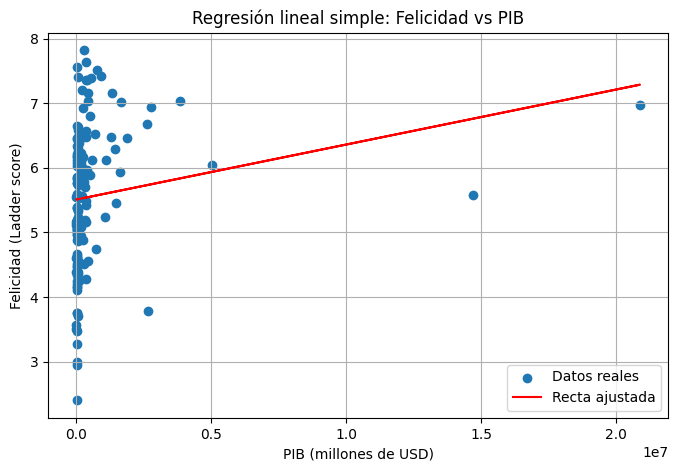

In [ ]:
plt.figure(figsize=(8,5))
plt.scatter(df["GDP(Mill USD)"], df["Felicidad (cantril ladder)"], label="Datos reales")
plt.plot(df["GDP(Mill USD)"], modelo.predict(X), color="red", label="Recta ajustada")
plt.xlabel("PIB (millones de USD)")
plt.ylabel("Felicidad (Ladder score)")
plt.title("Regresión lineal simple: Felicidad vs PIB")
plt.legend()
plt.grid(True)
plt.show()


Como podemos ver, la escala no ayuda mucho en este caso, de modo que conviene utilizar otra tecnica para vizualizar los datos de una mejor manera, tal vez una escala logaritmica podria funcionar bien, vayamos por ahi

## Regresion Lineal simple, con escala logaritmica

In [ ]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

import numpy as np

df["log_GDP"] = np.log(df["GDP(Mill USD)"])

X = sm.add_constant(df["log_GDP"])
Y = df["Felicidad (cantril ladder)"]

modelo_log = sm.OLS(Y, X).fit()
print(modelo_log.summary())

                                OLS Regression Results                                
Dep. Variable:     Felicidad (cantril ladder)   R-squared:                       0.222
Model:                                    OLS   Adj. R-squared:                  0.216
Method:                         Least Squares   F-statistic:                     39.59
Date:                        Sat, 24 Jan 2026   Prob (F-statistic):           3.83e-09
Time:                                22:06:04   Log-Likelihood:                -195.09
No. Observations:                         141   AIC:                             394.2
Df Residuals:                             139   BIC:                             400.1
Df Model:                                   1                                         
Covariance Type:                    nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------

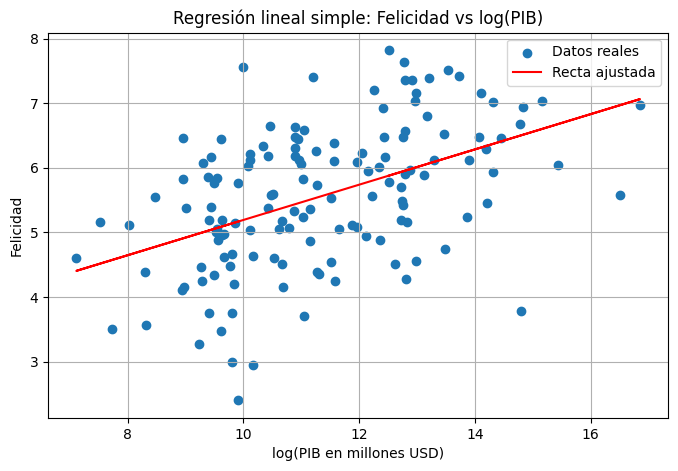

In [ ]:
# graficar datos
plt.figure(figsize=(8,5))
plt.scatter(df["log_GDP"], df["Felicidad (cantril ladder)"], label="Datos reales")
plt.plot(df["log_GDP"], modelo_log.predict(X), color="red", label="Recta ajustada")
plt.xlabel("log(PIB en millones USD)")
plt.ylabel("Felicidad")
plt.title("Regresión lineal simple: Felicidad vs log(PIB)")
plt.legend()
plt.grid(True)
plt.show()

plt.show()


Como podemos ver, ahora tenemos una mejor visualización de los datos reales, vemos que si bien estan dispersos tienen una mejor tendencia lineal.

Se obtuvo un pvalue < 0.0001, lo que significa que la probabilidad de encontrar un valor suponiendo que nuestro que no existe una relacion lineal entre las variables es practicamente 0.

Reforzando la idea que es un fuerte indicador de la felicidad

Sin embargo, vemos que tenemos un R^2 de 0.222, es decir, nuestro modelo explica solamente el 22.2% de la relacion entre la felicidad y el GDP de los paises, de modo que podemos inferir que si es una variable de interes al ser relevante, pero no es suficiente par explicar todo ese comportamiento, sugiriendo el utilizar mas variables para poder explicar la felicidad.

Como refuerzo a esto ultimo, vemos un valor de F-statistic de 39.59, es decir, nuestro modelo explica mejor CON PIB que sin PIB


# Otras variables de interes
Como vimos en el paso anterior que la variable de GDP solo explica en un 22.2% la relacion de la felicidad, una buena estrategia es buscar otras variables que nos puedan ayudar a explicar de mejor manera el comportamiento de la felicidad a partir de factores sociales, economicos, etc.

Para Este estudio, se opto por buscar variables en distintas fuentes, lo mas confiable parece ser utilizar variables del mismo WHR.

Las variables encontradas fueron

- **Social Support:** mide que tanto las personas sienten que tienen en alguien en quien confiar en momentos dificiles, la escala va del 0 al 1.
- **Health Life Expectancy:** mide que tantos años se esperan vivir con buena salud, se mide en años.
- **Freedom of making choices:** mide que tan satisfechas se sienten las personas se sienten con su libertad de tomar decisiones, la escala va del 0 al 1

De modo que estaremos trabajando con estas variables para ver si podemos mejorar un poco la relacion del modelo con respecto a estas variables.

# Cargar base de datos nueva

NOTA: para mayor practicidad se uso el archivo anexado en esta practica, con la diferencia que estas nuevas variables se agregaran a la hoja principal, como una especie de "merge", donde se haran coincider por medio del nombre del pais, en caso de no tener ese pais en la lista, no se utilizara.

In [ ]:
# cargar nueva base de datos
df_nuevo = pd.read_csv('/content/drive/MyDrive/Inteligencia_Artificial_1/Felicidad_con_mas_variables.csv')

In [ ]:
# ver las nuevas variables
df_nuevo

,Pais,Social support,Healthy life expectancy,Freedom to make life choices
0,Finland,0.954330,71.900825,0.949172
1,Denmark,0.955991,72.402504,0.951444
2,Switzerland,0.942847,74.102448,0.921337
3,Iceland,0.974670,73.000000,0.948892
4,Norway,0.952487,73.200783,0.955750
...,...,...,...,...
148,Central African Republic,0.319460,45.200001,0.640881
149,Rwanda,0.540835,61.098846,0.900589
150,Zimbabwe,0.763093,55.617260,0.711458
151,South Sudan,0.553707,51.000000,0.451314


In [ ]:
# unir las nuevas variables conforme al pais
df_unido = pd.merge(df, df_nuevo, on='Pais', how='inner')

In [ ]:
df_unido

,Pais,Felicidad (cantril ladder),GDP(Mill USD),log_GDP,Social support,Healthy life expectancy,Freedom to make life choices
0,Finland,7.8210,271837.000000,12.512958,0.954330,71.900825,0.949172
1,Denmark,7.6362,356085.000000,12.782925,0.955991,72.402504,0.951444
2,Iceland,7.5575,21718.075725,9.985900,0.974670,73.000000,0.948892
3,Switzerland,7.5116,752248.000000,13.530821,0.942847,74.102448,0.921337
4,Netherlands,7.4149,913865.000000,13.725438,0.939139,72.300919,0.908548
...,...,...,...,...,...,...,...
131,Botswana,3.4711,14930.072799,9.611133,0.779122,58.924454,0.821328
132,Rwanda,3.2682,10184.345442,9.228607,0.540835,61.098846,0.900589
133,Zimbabwe,2.9951,18051.170799,9.800966,0.763093,55.617260,0.711458
134,Lebanon,2.9553,25948.915861,10.163885,0.824338,67.106583,0.551358


Observacion: notese como se redujo el tamaño original de las observaciones, muy seguramente debido a que algunos paises no tenian ciertos datos, de modo que se descartaron automaticamente, mas especificamente se quitaron 5 observaciones.

# Regresion Lineal Multiple

Ahora vamos a ver si con estas variables, podemos explicar mejor el comportamiento de nuestro conjunto de datos

In [ ]:
# ver nuestro dataset
print(df_unido.shape)
print(df_unido.columns)

(136, 7)
Index(['Pais', 'Felicidad (cantril ladder)', 'GDP(Mill USD)', 'log_GDP',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices'],
      dtype='object')


De modo que obtenemos 136 observaciones y 7 variables para trabajar

Empezaremos generando datos de entranemiento y prueba, con una proporcion del 80% de los datos originales

In [ ]:
# Genera datos de entrenamiento
train = df_unido.sample(frac = 0.8)
# Genera datos de validación
test = df_unido.drop(train.index)
# Imprime dimensiones de datos de entrenamiento
print("Train:", train.shape)
# Imprime dimensiones de datos de prueba
print("Test:",test.shape)
# Imprime primeras 5 filas de datos de entrenamiento
print(train.head())

Train: (109, 7)
Test: (27, 7)
           Pais  Felicidad (cantril ladder)  GDP(Mill USD)    log_GDP  \
124        Togo                      4.1123   7.574637e+03   8.932561   
24    Singapore                      6.4802   3.452960e+05  12.752157   
11    Australia                      7.1621   1.327840e+06  14.099064   
52     Honduras                      6.0221   2.382784e+04  10.078610   
87   Bangladesh                      5.1555   3.739020e+05  12.831749   

     Social support  Healthy life expectancy  Freedom to make life choices  
124        0.551313                54.719898                      0.649829  
24         0.910269                76.804581                      0.926645  
11         0.944855                73.604538                      0.915432  
52         0.821870                67.198769                      0.870603  
87         0.687293                64.503067                      0.900625  


Vamos a realizar la regresion lineal multiple con nuestros datos ya divididos

In [ ]:
import statsmodels.api as sm

# Variable dependiente (felicidad)
Y = train['Felicidad (cantril ladder)']

# Variables independientes (todas menos felicidad y país)
X = train.drop(['Felicidad (cantril ladder)', 'Pais'], axis=1)

# Agregar intercepto
X = sm.add_constant(X)

# Ajustar modelo
model = sm.OLS(Y, X)
results = model.fit()

# Resumen
print(results.summary())


                                OLS Regression Results                                
Dep. Variable:     Felicidad (cantril ladder)   R-squared:                       0.732
Model:                                    OLS   Adj. R-squared:                  0.719
Method:                         Least Squares   F-statistic:                     56.25
Date:                        Sun, 25 Jan 2026   Prob (F-statistic):           6.53e-28
Time:                                00:17:24   Log-Likelihood:                -96.588
No. Observations:                         109   AIC:                             205.2
Df Residuals:                             103   BIC:                             221.3
Df Model:                                   5                                         
Covariance Type:                    nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------

OBSERVACIONES: notese como con este modelo de regresion lineal multiple, nuestra R^2, tuvo un cambio significativo, de 0.222 a 0.719, es decir, ahora con estas nuevas variables nuestro modelo puede predecir casi un 72% en el entrenamiento del conjunto de datos, eso es un incremento de casi 50 puntos porcentuales.

Asi mismo notese que al agregar nuevas variables, otras dejaron de tener tanta relevancia para el modelo, como por ejemplo:

- log_GDP, p|t|= 0.729
- GDP    , p|t|= 0.337

Sabiendo que la variable de log_GDP es la medida del GDP pero en escala logaritmica para una mejor visualizacion de los datos, dejo de importar casi en un 72%

En cambio la variable original de GDP, dejo de ser relevante en un 33%, es decir, si aydua a describir el comportamiento, pero no tanto como las nuevas variables.

Calcular otros resultados

In [ ]:
# Calcular F-statistic y p-value
import scipy.stats as st
yhat = results.predict(sm.add_constant(X))
ybar = np.mean(Y)
ESS = sum((yhat - ybar)**2)
m = X.shape[1] - 1
EMS = ESS / m
RSS = sum((Y - yhat)**2)
n = X.shape[0]
RMS = RSS / (n - m - 1)
F = EMS / RMS
pval = st.f.sf(F, m, n - m - 1)
print("F =", F)
print("p-value =", pval)

F = 56.248793779880344
p-value = 6.52813477435366e-28


Como ya vimos que algunas variables parecen no aportar demasiado, vamos a quitarlas y ver como se comporta el modelo, este caso, quitaremos log_GDP por su pvalue de 73 %

In [ ]:
# Genera el nuevo elemento X, sin la variable alcohol
XNew = X.drop('log_GDP', axis = 1)
# Define el nuevo modelo
modelNew = sm.OLS(Y,sm.add_constant(XNew))
# Ajusta el nuevo modelo
resultsNew = modelNew.fit()

Ahora volvamos a calcular los datos para ver si mejoro o empeoro

In [ ]:
yhatNew = resultsNew.predict(sm.add_constant(XNew))
RSSNew = sum((Y-yhatNew)**2)
EMSNew = (RSSNew - RSS) / 1
FNew = EMSNew / RMS
pvalNew = st.f.sf(FNew, 1, n-m-1)
t = np.sqrt(FNew)
print("New F =", FNew)
print("t-value =", t)
print("p-value =", pvalNew)
print("OLS's p-value =", results.pvalues.log_GDP)

New F = 0.12033581824152356
t-value = 0.3468945347530335
p-value = 0.7293782896073862
OLS's p-value = 0.7293782896073646


In [ ]:
# Quitar 'const' de la lista de columnas
cols_modelo = results.model.exog_names.copy()
cols_modelo.remove('const')

# Usar esas columnas en test
XTest = test[cols_modelo]

# Agregar constante
XTest = sm.add_constant(XTest)

# Ahora sí predecir
yhatTest = results.predict(XTest)

# Errores
RSSTest = sum((YTest - yhatTest)**2)
TSSTest = sum((YTest - np.mean(YTest))**2)

nTest = XTest.shape[0]
mTest = XTest.shape[1]   # sin constante

# Métricas
RSETest = np.sqrt(RSSTest / (nTest - mTest - 1))
R2Test = 1 - RSSTest / TSSTest

print("RSE test =", RSETest)
print("R^2 test =", R2Test)


RSE test = 0.6422473740999439
R^2 test = 0.6253273782192916


Ya en el test obtuvimos un R^2 de 0.625, un poco mas bajo que el training, pero dentro de lo que cabe, sigue siendo razonable, con esto podemos decir que nuestro nuevo modelo multivariado explica el 62.5% del conjunto de datos, es un valor razonable para cuestiones relacionadas a la felicidad, las cuales tienden a ser subjetivas.

# Conclusiones

Con este estudio encontramos factores que podrian determinar en su mayoria la felicidad, mas alla de eso vimos que al usar una regresion lineal simple, podemos describir el comportamiento de un conjunto de datos, sin embargo no es tan preciso y nunca lo sera como usar una regresion lineal multiple, con la cual al tener mas variables explicativas se puede entender y modelar mejor el comportamiento de un conjunto de datos.

Para este estudio en especifico, al principio, natural e intuitivamente, pensamos que el GDP (producto interno bruto), podria determinar la felicidad de las personas de diversos paises debido a su factor economico, en el primer modelo de regresion lineal simple, exploramos que podria ser una posibilidad, sin embargo, al realizar la regresión lineal multiple, agregando ,mas variables, nos dimos cuenta que eso no necesariamente es verdad, al agregar variables como la esperanza de una vida saludable, la percepcion del apoyo social y la percepcion de la libertad, nos dimos cuenta por medio de estadistica, que esos factores pasan a un segundo plano cuando se trata de hablar de lo que define la verdadera felicidad.

# Referencias APA
- *Data sharing | The World Happiness Report. (s. f.). https://www.worldhappiness.report/data-sharing/*
- *Frequently asked questions | The World Happiness Report. (s. f.-b). https://www.worldhappiness.report/faq/*
- *Home | The World Happiness Report. (2025, 20 agosto). https://www.worldhappiness.report/*
- *Macrotrends. (s. f.). GDP by country. Recuperado de https://www.macrotrends.net/global-metrics/countries/ranking/gdp-gross-domestic-product*